In [25]:
#RANDOM SQUARE ART

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def determine_block_color():
    
    selected_color = np.random.choice(colors)                #select color
    return(selected_color)

In [27]:
def select_element():                                        #selected (by index) element is NW of square
    
    temp_grid = np.copy(grid)                                #create temporary 1D grid (copy of grid)
    k = 0
    
    for i in range(grid.size):                               #loop thru termporary 1D grid elements and set zeros to positive integers 'k'
        if temp_grid[i] == 0:
            k = k + 1
            temp_grid[i] = k
    
    selection = np.random.randint(1, k + 1)                  
    return(np.where(temp_grid == selection)[0])              #return 1D grid index of random positive integer selection

In [28]:
def determine_block_size():
    
    availablex_space = number_cols - (selected_index % number_cols)           #determine physical space available
    availabley_space = number_rows - (selected_index // number_cols)           
    approved_space = min(availablex_space, availabley_space);                            

    n = 0
    flag = True
    selected_row_index = selected_index // number_cols; 
    selected_col_index = selected_index % number_cols; 
    
    while flag:
        n = n + 1
        test_array = (                                                       #create nxn subarray of 1d grid   
                  grid.reshape((number_rows, number_cols))
                  [selected_row_index : selected_row_index + n + 1, selected_col_index : selected_col_index + n + 1]  )
        if (np.any(test_array != 0)) or ((n + 1) > approved_space):          #test if subarray is all zero 
            flag = False
    
    if n == 1:
        m = 1
    else:
        m = np.random.randint(1, n + 1)
        
    return(m)                                                                #mxm will be the size of the merged block

In [29]:
def block_merge():                                                           #write color code (-1 to -6) to grid
    for i in range(block_size):                                              #loop thru '2d grid' rows
        for j in range(block_size):                                          #loop thru '2d grid' columns
            grid[(selected_index + j) + (number_cols * i)] = block_color

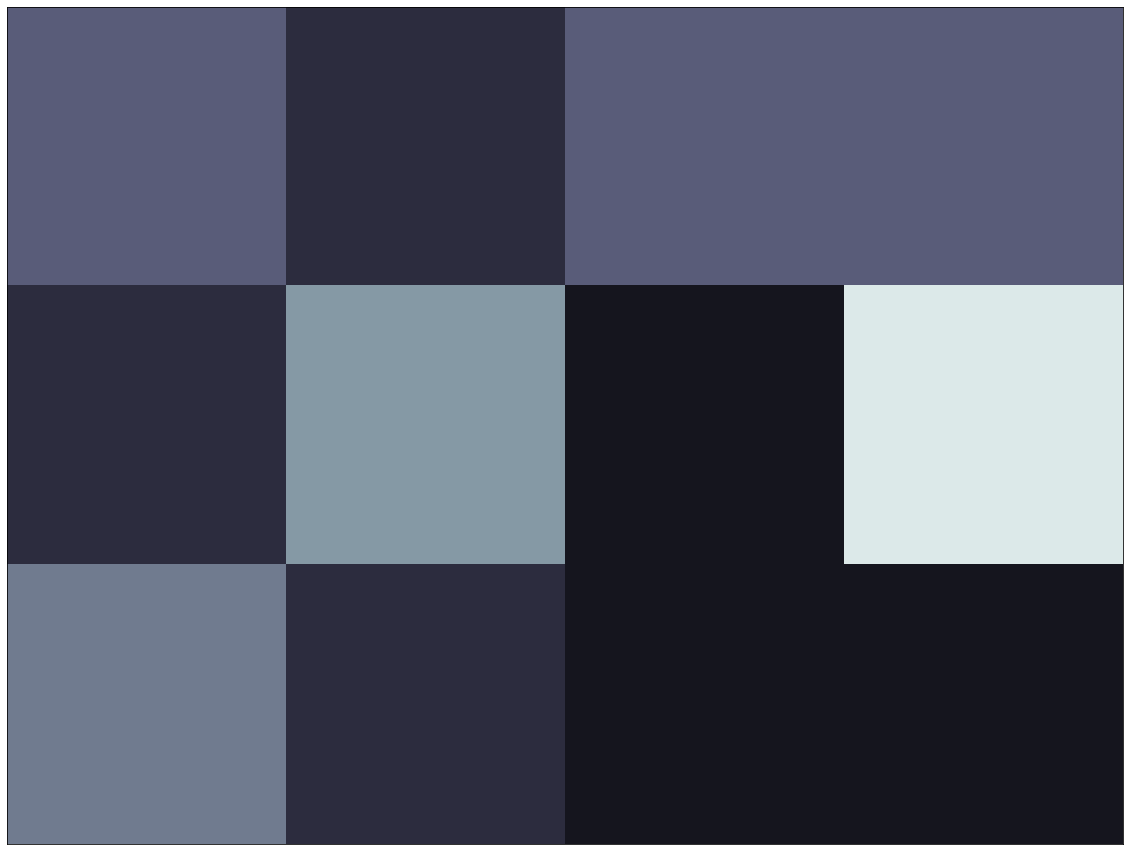

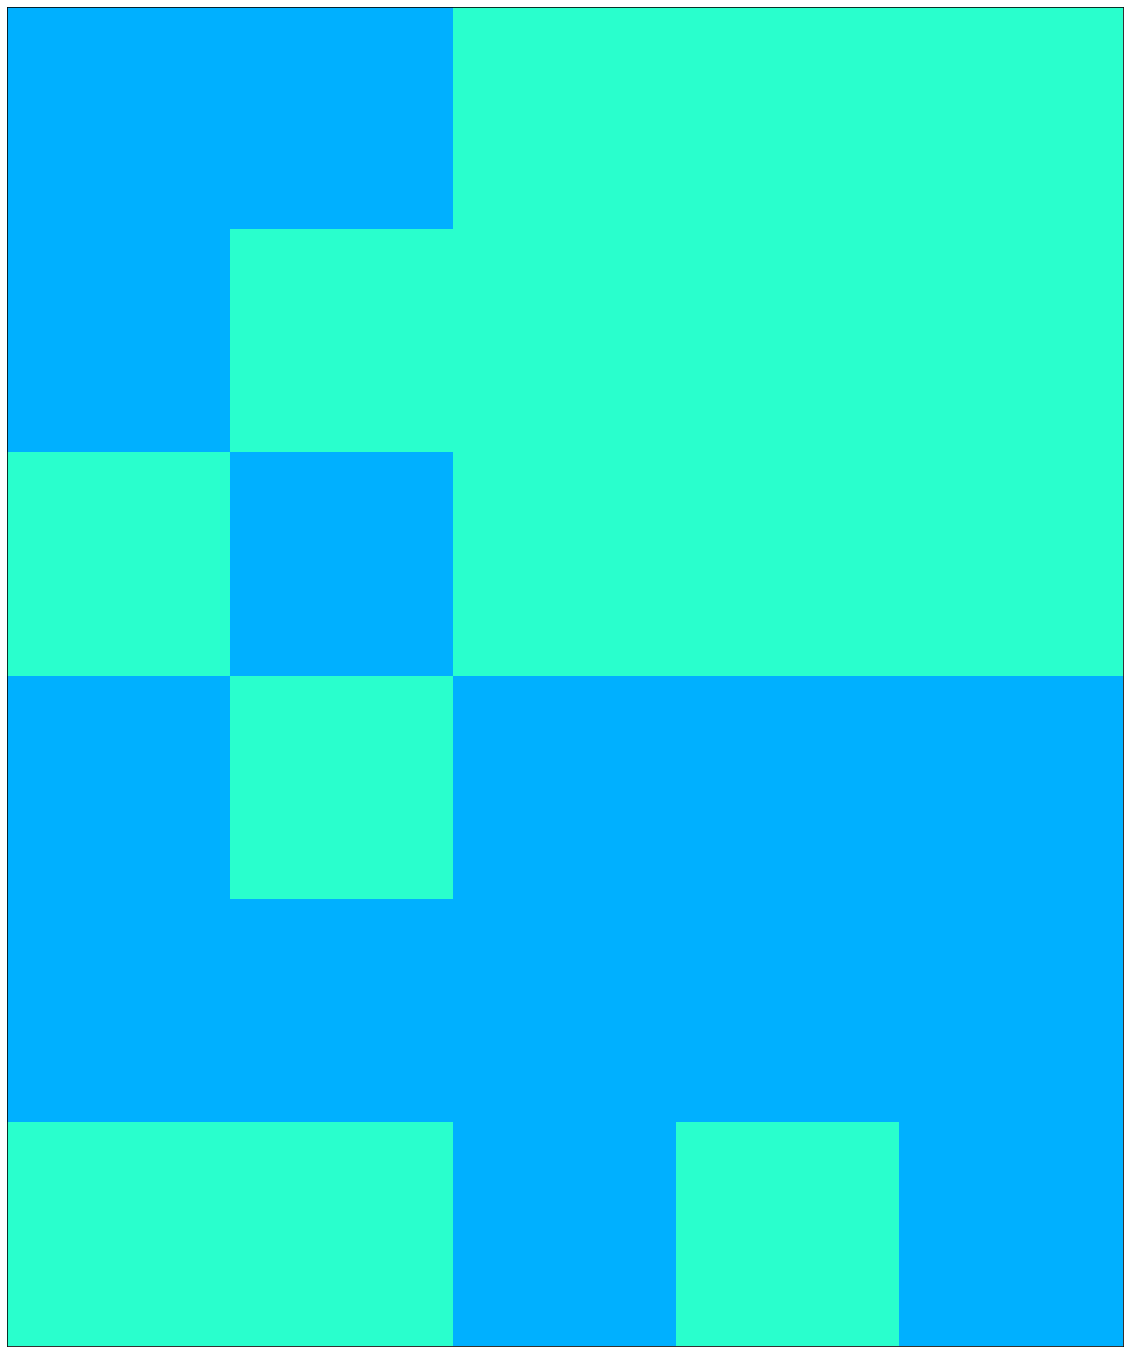

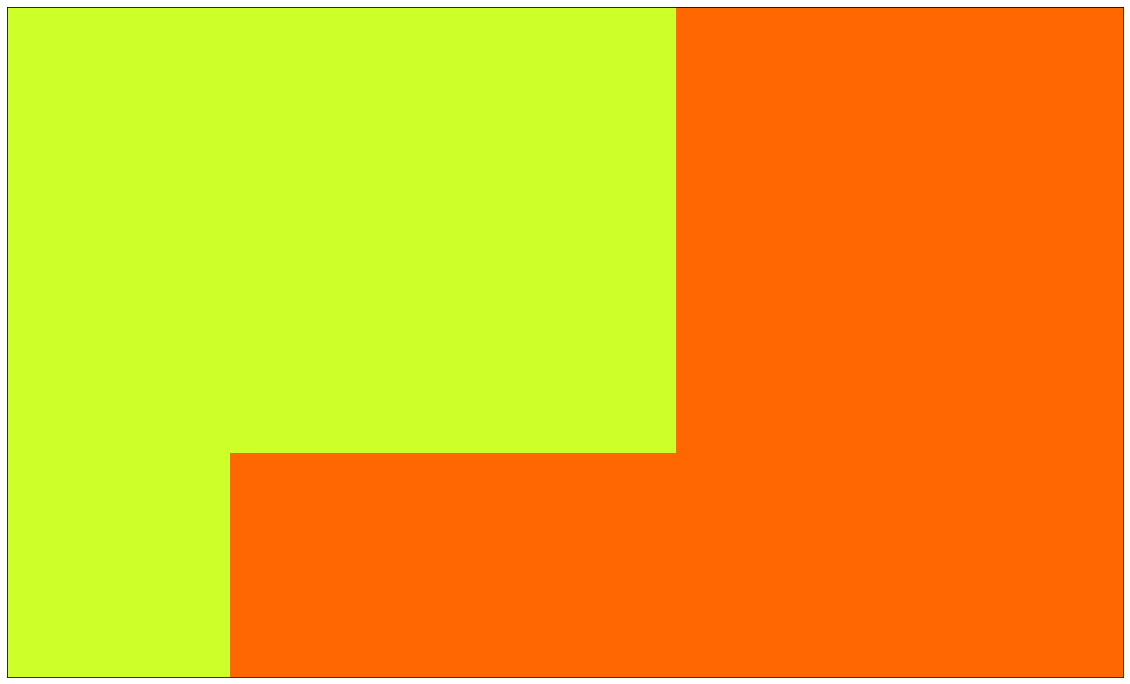

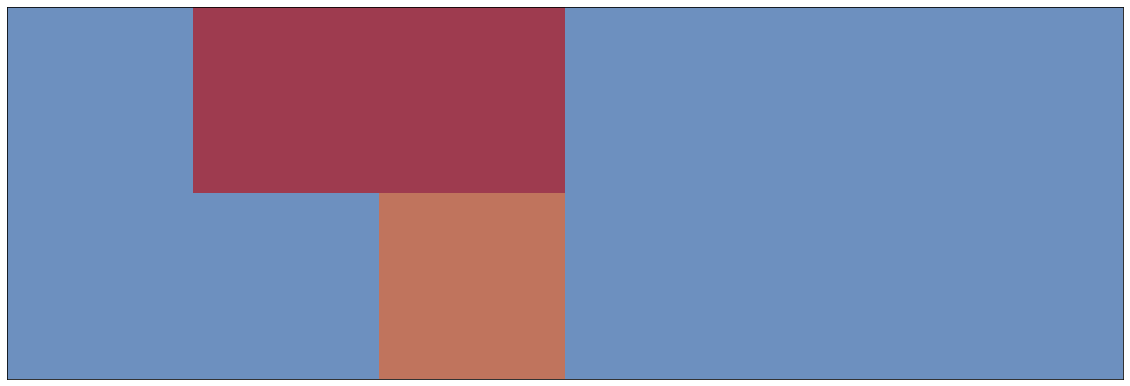

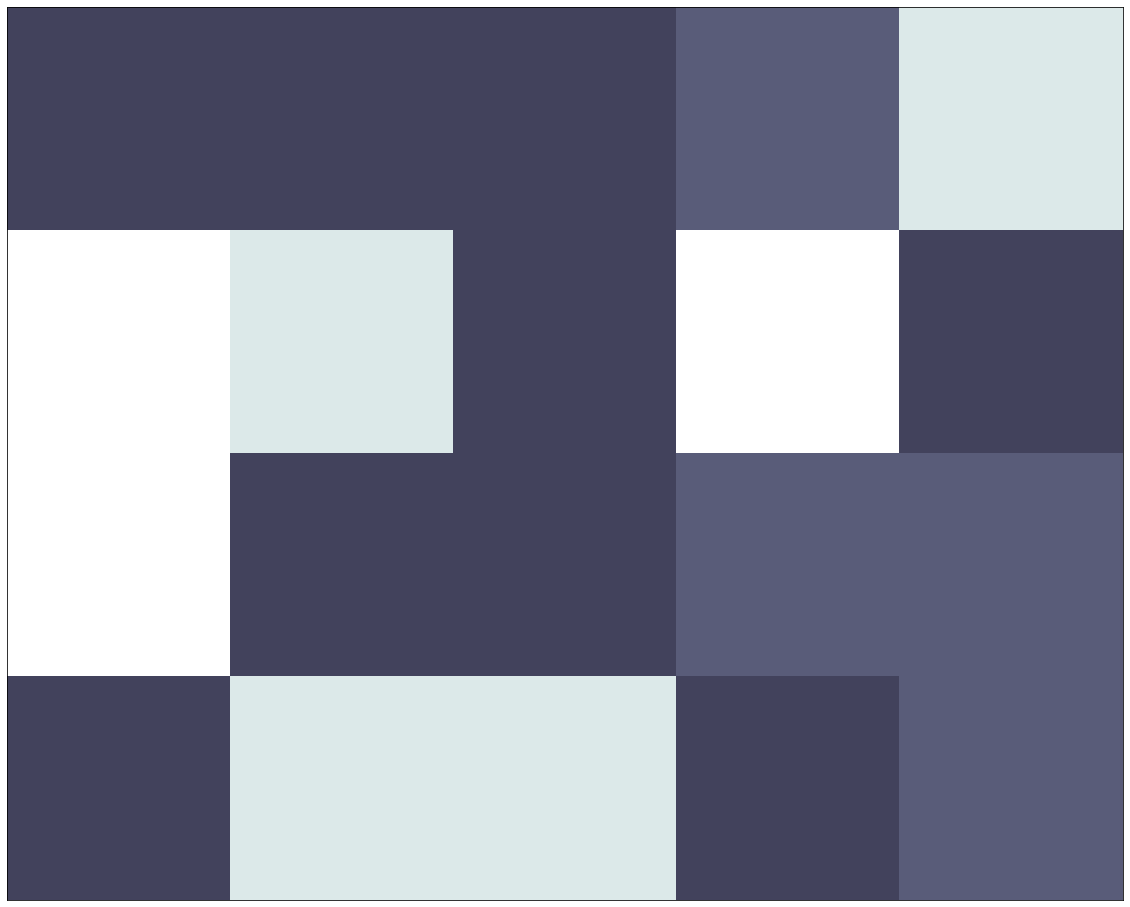

In [30]:
###############################################         MAIN MAIN MAIN MAIN       #################
for q in range(1, 1001):
    #establish figure, axes objects
    fig, ax = plt.subplots(figsize = (20, 25))

    colors = []; maps = np.random.choice(['summer', 'terrain', 'jet', 'bone', 'twilight', 'cool', 'hot'])
    quantity_color = np.random.randint(2, 11)
    for i in range(quantity_color):
        color = -1 * np.random.randint(1, 11)
        colors.append(color)

    # establish grid size and color scheme via input
    number_rows = np.random.choice([2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 20, 25, 30, 40, 50, 75, 100, 200, 300, 400, 500])
    number_cols = np.random.choice([2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 20, 25, 30, 40, 50, 75, 100, 200, 300, 400, 500])

    grid = np.zeros(number_rows * number_cols)                   #establish 1D 'grid' of zeros 'available'
    while 0 in grid:
        block_color = determine_block_color()                    #color of square
        selected_index = select_element()[0]                     #integer index of 1D grid element to start (NW) new block
        block_size = determine_block_size();                     #size of square
        block_merge()                                            #write square info to grid
        ax.tick_params(bottom = False, left = False, labelbottom = False, labelleft = False)
        ax.imshow(grid.reshape(number_rows, number_cols), vmin = -11, vmax = -1, cmap = maps)     
        plt.savefig(f'{q}.jpg')